<img src="./iris-machinelearning.png" height=60 />
Ref[1]

## FYS: Artificial Intelligence - Opportunities and Responsibilities 

    Part 1: Project Introduction 
    Part 2: Mathematics needed for our project
    Part 3: Loading and exploring data
    Part 4: Changing math equations into code and building a machine learning model
    Part 5: Training the model
    Part 6: making predictions with a trained model
    Part 7: Conclusion/Next steps

### Part 1: Project Introduction 

**Goal:** By the end of the course, we woulf have created a machine learning model that can classify the different species of the Iris flower. With the right data, this could be extended to any classification problem.
<img src="dataset_visual.png"/>
Ref[2]

**About the data:** The <a href="https://www.wikiwand.com/en/Iris_flower_data_set">Iris flower data set or Fisher's Iris data set </a> is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper titled "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis.

This is a small dataset commonly used to test Machine Learning classification models.
The dataset consists of 150 samples of measurements taken from 3 species of Iris flowers. The original dataset can be found here <a href="https://archive.ics.uci.edu/ml/datasets/iris"> Here </a>

Why did we choose this dataset? 
1. It is a small dataset with easy to understand class distinctions
2. it is relatively simple to train a neural network or any other machine learning model on this dataset to recognize those classes.
3. It is easy to fit this data in memory and train on it on a relatively good machine without need for extra computational power

### Part 2: Mathematics needed for our project

suppose we have a bivariate data $(x_{i}, y_{i}), i = 1,...,n $ .  The goal of a linear regression is to model the relationship between x and y by finding a function $y = f(x)$ that is a close fit to the data. <br>
The modeling assumptions we will use are that $x_{i}$ is not random and that $y_{i}$ is a function of $x_{i}$ plus some random noise. <br>
With these assumptions, $x$ is called the independent/predictor variable and $y$ is called the dependent/response variable. <br>

However, the iris dataset is multivariate, that is, it has more than one independent variable/inputs; Sepal length, sepal width, petal length and petal width. <br>
Using the same logic, we can express the input x as a linear combination of the four features, $f_1, f_2,f_3 and f_4$ as <br>
$x = w_1f_1 + w_2f_2 + w_3f_3 + w_4f_4$

Question: how do we transform a logistic regression model to a predictor <br>
Answer: Use a logisitc function <br>
We know that the sum of products results in a real-valued output. However, we are intested in a categorical value, ie 0 or 1. Therefore, a logistic function works as a squashing function 	$\sigma$ that compresses the range of possible output values to the range $[0, 1]$ ie <br>
$\hat y = \sigma(x)$. <br>
Because the output is always between 0 and 1, it can be interpreted as a probability

#### sigmoid function inplementation in python 

$\hat y = \sigma(x) = \frac{\mathrm{1} }{\mathrm{1} + e^{-y}}$

Implementing the same function as python code. 

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_palette('husl')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def sigmoid_fun(z):
    return 1.0 / (1.0 + np.exp(-z))

In [3]:
y = np.arange(-10, 10, 0.1)
yhat = sigmoid_fun(y)

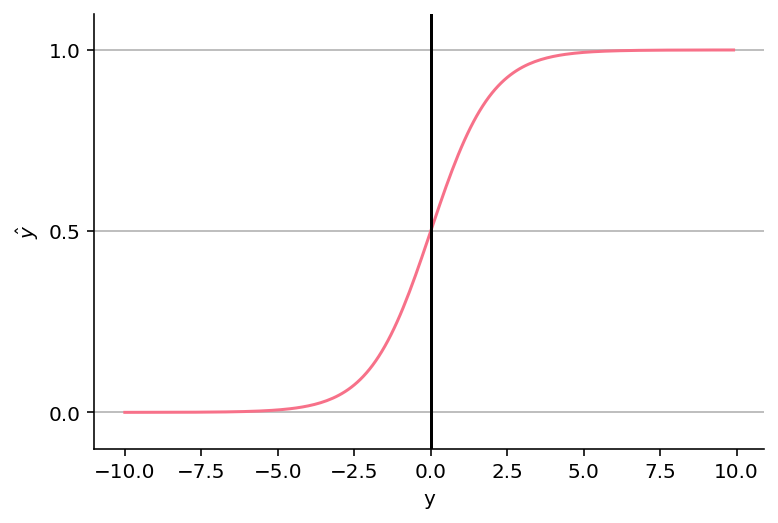

In [4]:
plt.plot(y, yhat)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('y')
plt.ylabel('$\hat y$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
sns.despine()


### Part 3: Loading and Exploring the dataset

In [5]:
#load the dataset
dataset = pd.read_csv('Iris_dataset.csv')

In [6]:
dataset.drop(["Id"], axis=1, inplace=True)

In [7]:
# basic information 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# top 5 entries
dataset.head() # This is the same as dataset.iloc[0:5, :]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


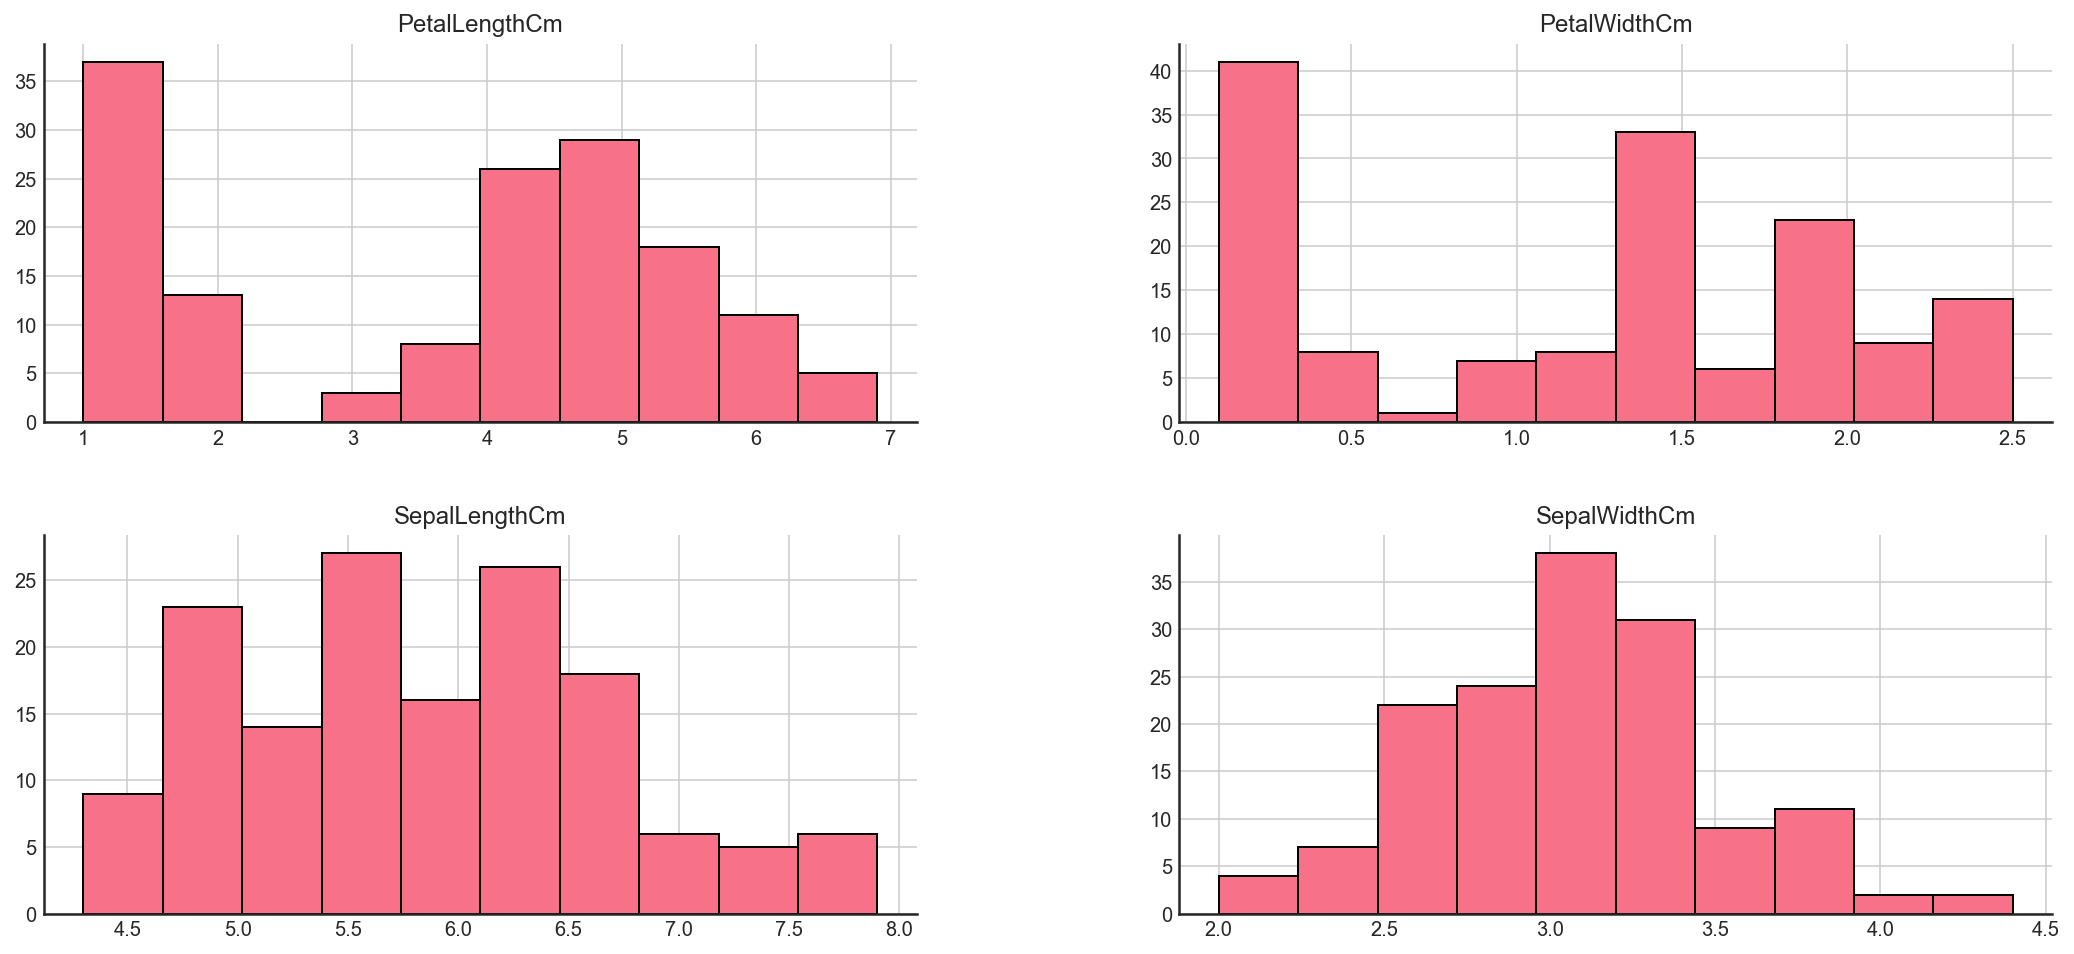

In [10]:
plt.style.use('seaborn-white')
dataset.hist(edgecolor=(0,0,0), linewidth=1)
fig=plt.gcf()
fig.set_size_inches(18, 8)
sns.despine()
plt.show()

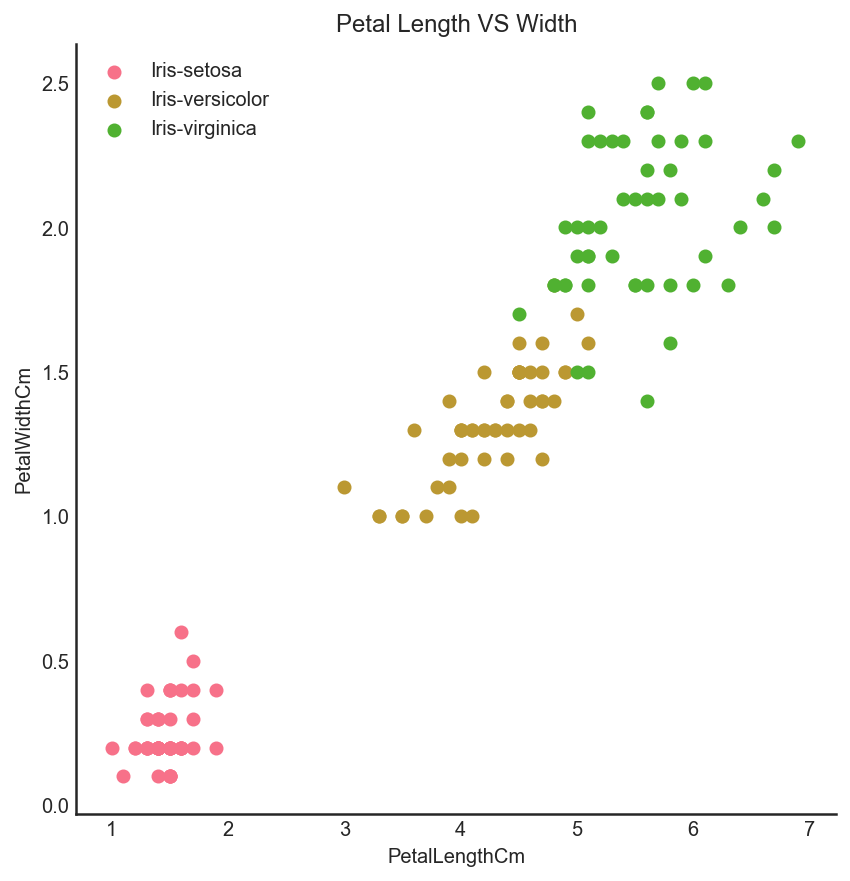

In [11]:
petalPlt = sns.FacetGrid(dataset, hue="Species", height=6).map(plt.scatter, "PetalLengthCm", "PetalWidthCm")
plt.legend(loc='upper left');
plt.title("Petal Length VS Width");

What is the bivariate relationship between each pair of the features?

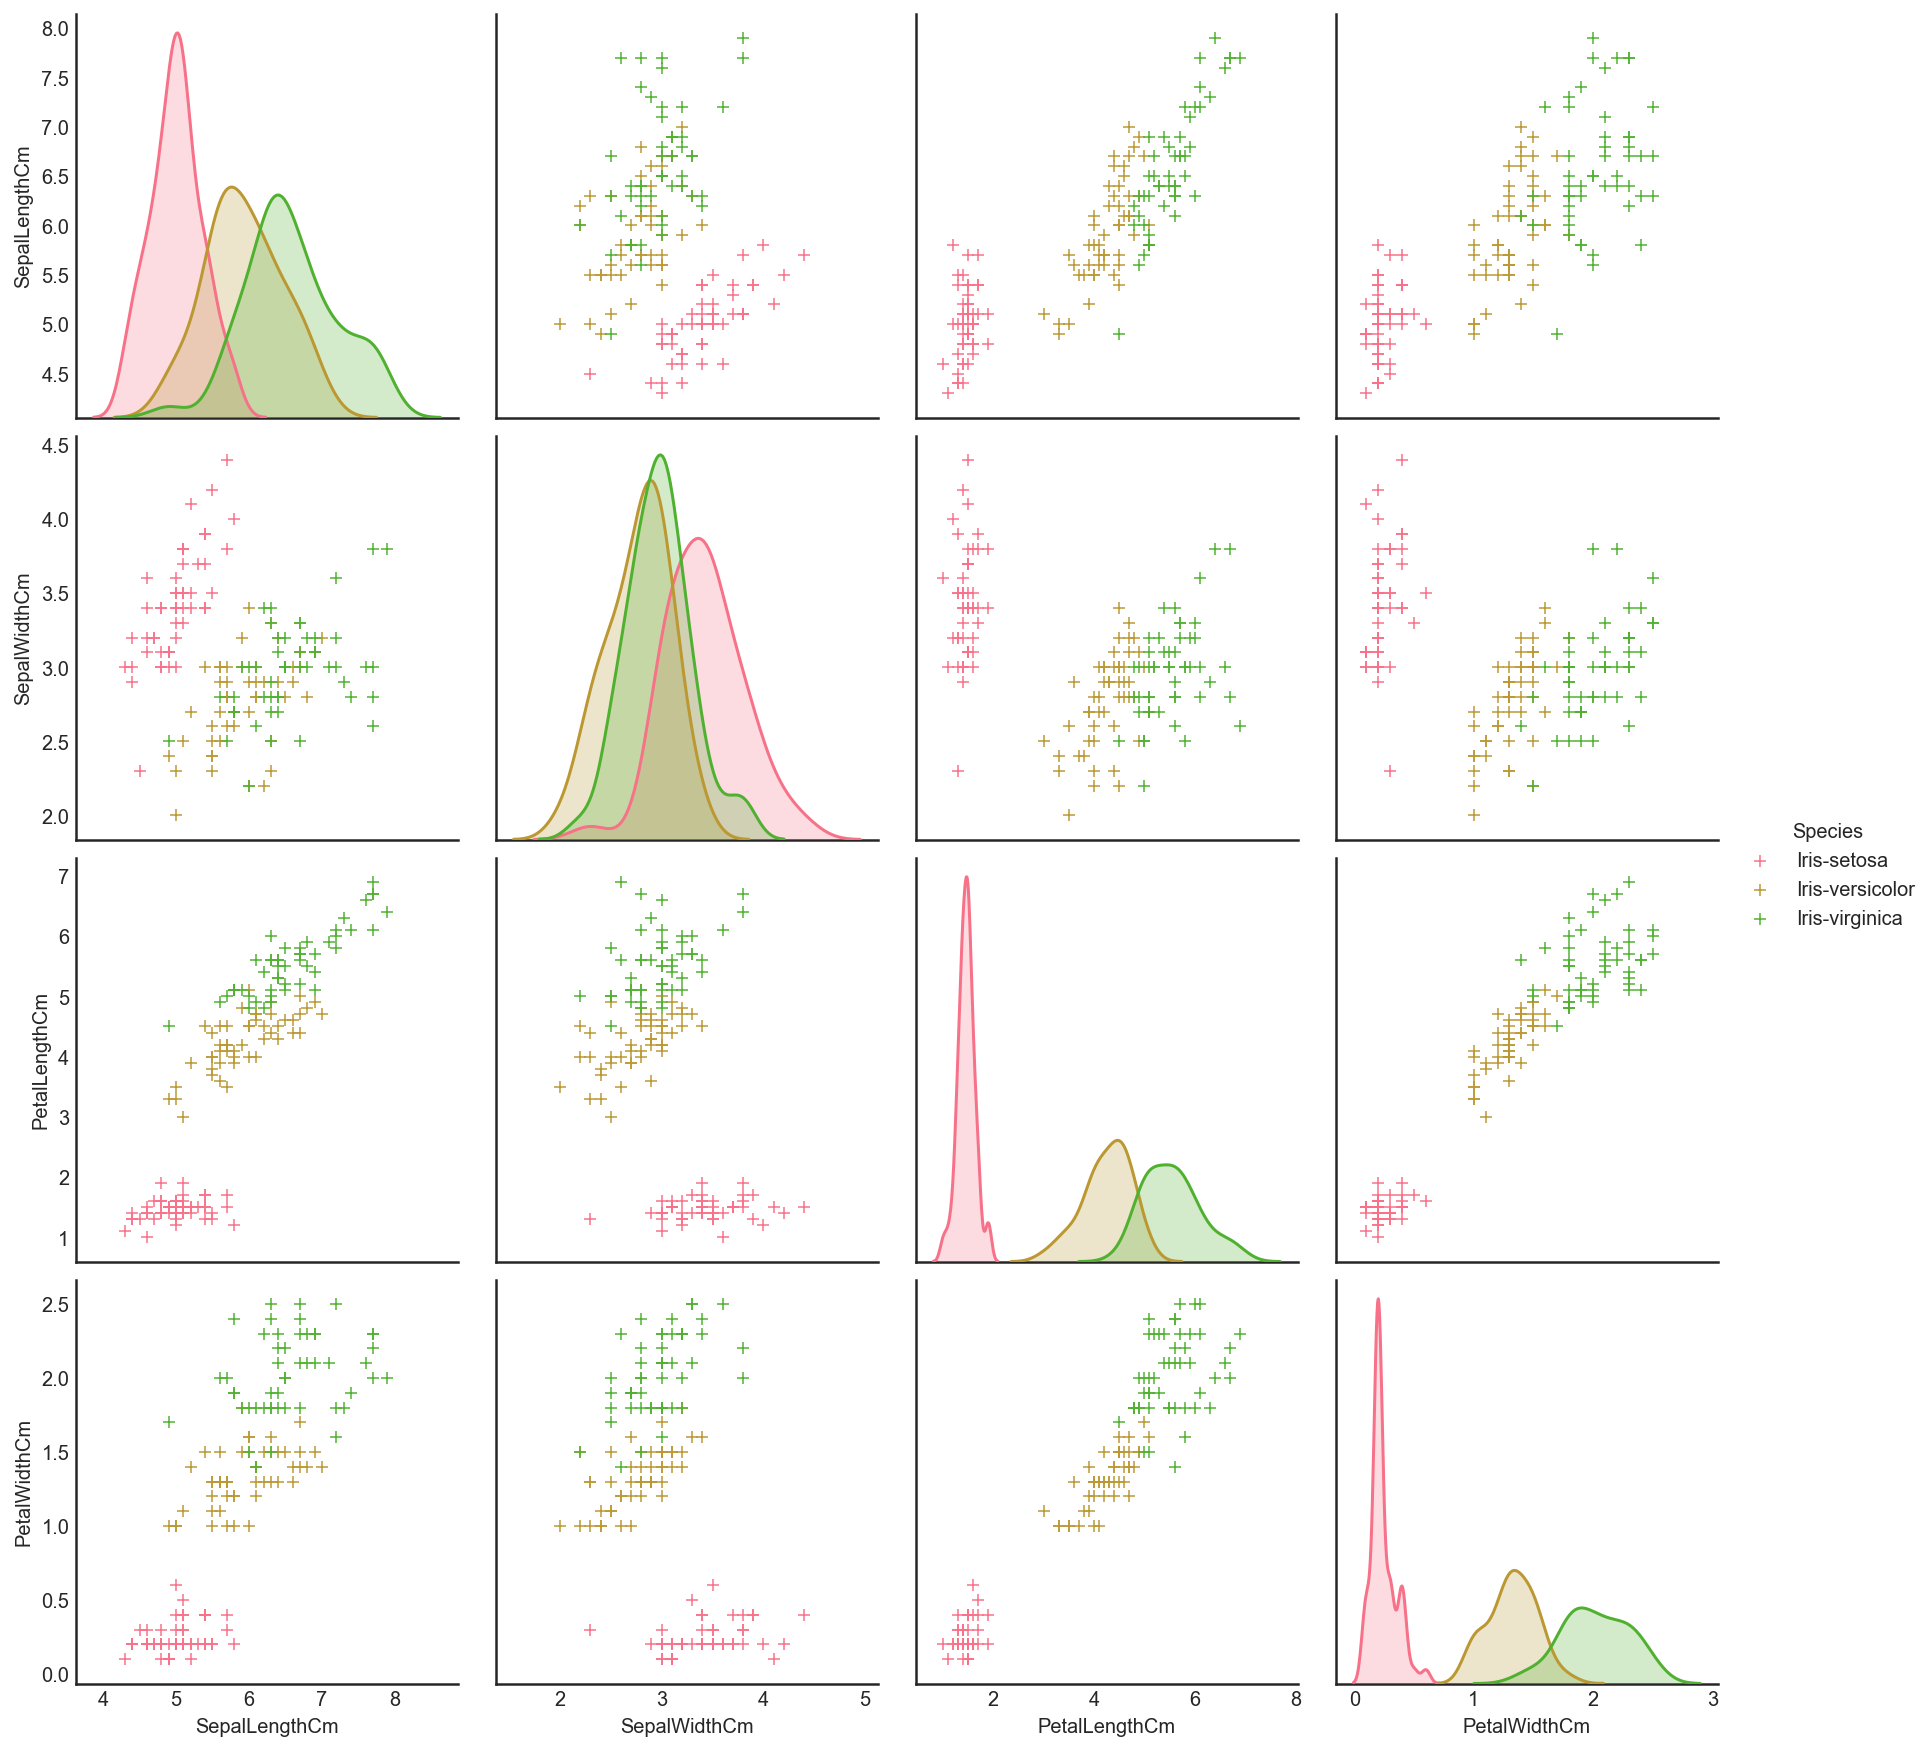

In [12]:
b = sns.pairplot(dataset,hue="Species",diag_kind="kde", markers='+',height =3 );
plt.show()

### Part 4: Changing math equations into code and building a machine learning model

The mathematical explanation we have provided thus far is sufficent enough to provide a basic mathematical understand of linear regression. Instead of coding the same function up, we will use a framework that has already implemented this. <br>
In your career as a machine learning practioner, it is on rare occessions that you have to implement any algorithm from scratch. Most of these algorithms have already been implemented as frameworks/Libraries; a suite of machine learning algorithms ready to be used. <br>
The major advantages of using existing libraries include;
1. You don't have to re-invent the wheel 
2. Constant support and updates from the massive open source communities
3. Some of these frameworks were created by top research labs so you are always using cutting adge models/code
<br>

Examples of top frameworks include; Tensorflow, Keras, Pytorch, CAFFE, sckit-learn, etc. 
Note: However, it helps that you understand the code behind these frameworks ie take atleast a class on fundamentals of Machine Learning.

For this class project, we will use linear regression from <a href ='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression' >sckit-learn</a>

But first, we have to prepare the data in the format that the model accepts

Remember, we are using (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) to predict (Species)

In [25]:
label_mapping = {
    'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}

In [ ]:
100
010
001

In [26]:
dataset_X = dataset.drop(['Species'], axis=1).values
dataset_Y = dataset.Species.replace(label_mapping).values.reshape(dataset.shape[0], 1)

In [27]:
# we just replaced the labels with values that the mode will understand
check_df = dataset.copy()
check_df['Labels'] = dataset_Y
check_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Labels
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3
146,6.3,2.5,5.0,1.9,Iris-virginica,3
147,6.5,3.0,5.2,2.0,Iris-virginica,3
148,6.2,3.4,5.4,2.3,Iris-virginica,3


In [30]:
X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_Y, test_size=0.3, shuffle = True, random_state = 123)

In [31]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105, 1)
y_test shape: (45, 1)


References.<br>
1. Banner Image.https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png <br>
2. Data Explanation Image: https://medium.com/@jebaseelanravi96/machine-learning-iris-classification-33aa18a4a983 <br>
3. Linear regression primer: https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading25.pdf <br>
4. http://karlrosaen.com/ml/notebooks/logistic-regression-why-sigmoid/ 
5. https://www.askaswiss.com/2017/12/how-to-classify-iris-species-using-logistic-regression.html